## Feature Engineering

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../data/data-preprocessed.csv")

In [4]:
import missingno as msno

In [5]:
data.iloc[:,26:39].head()

,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,ATENDIMENTOS_AGENDA_Faltas Acolhimento,ATENDIMENTOS_AGENDA_Datas Acolhimento,ATENDIMENTOS_AGENDA_Qde Psicoterapia,ATENDIMENTOS_AGENDA_Faltas Psicoterapia,ATENDIMENTOS_AGENDA_Qde Prescrições,ATENDIMENTOS_AGENDA_Datas Prescrição,TWILIO_Mensagens Inbound,TWILIO_Mensagens Outbound,TWILIO_Ligações Outbound,PESSOA_PIPEDRIVE_age,PESSOA_PIPEDRIVE_has_public_health_plan,PESSOA_PIPEDRIVE_tem_data_dataframe_de_termino_de_contrato
0,1,0,2022-04-29 18:00:00,0,0,0,NaN,13,38,2,52,0,0
1,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,32,1,1
2,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,38,1,1
3,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,32,1,1
4,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,37,1,1


<Axes: >

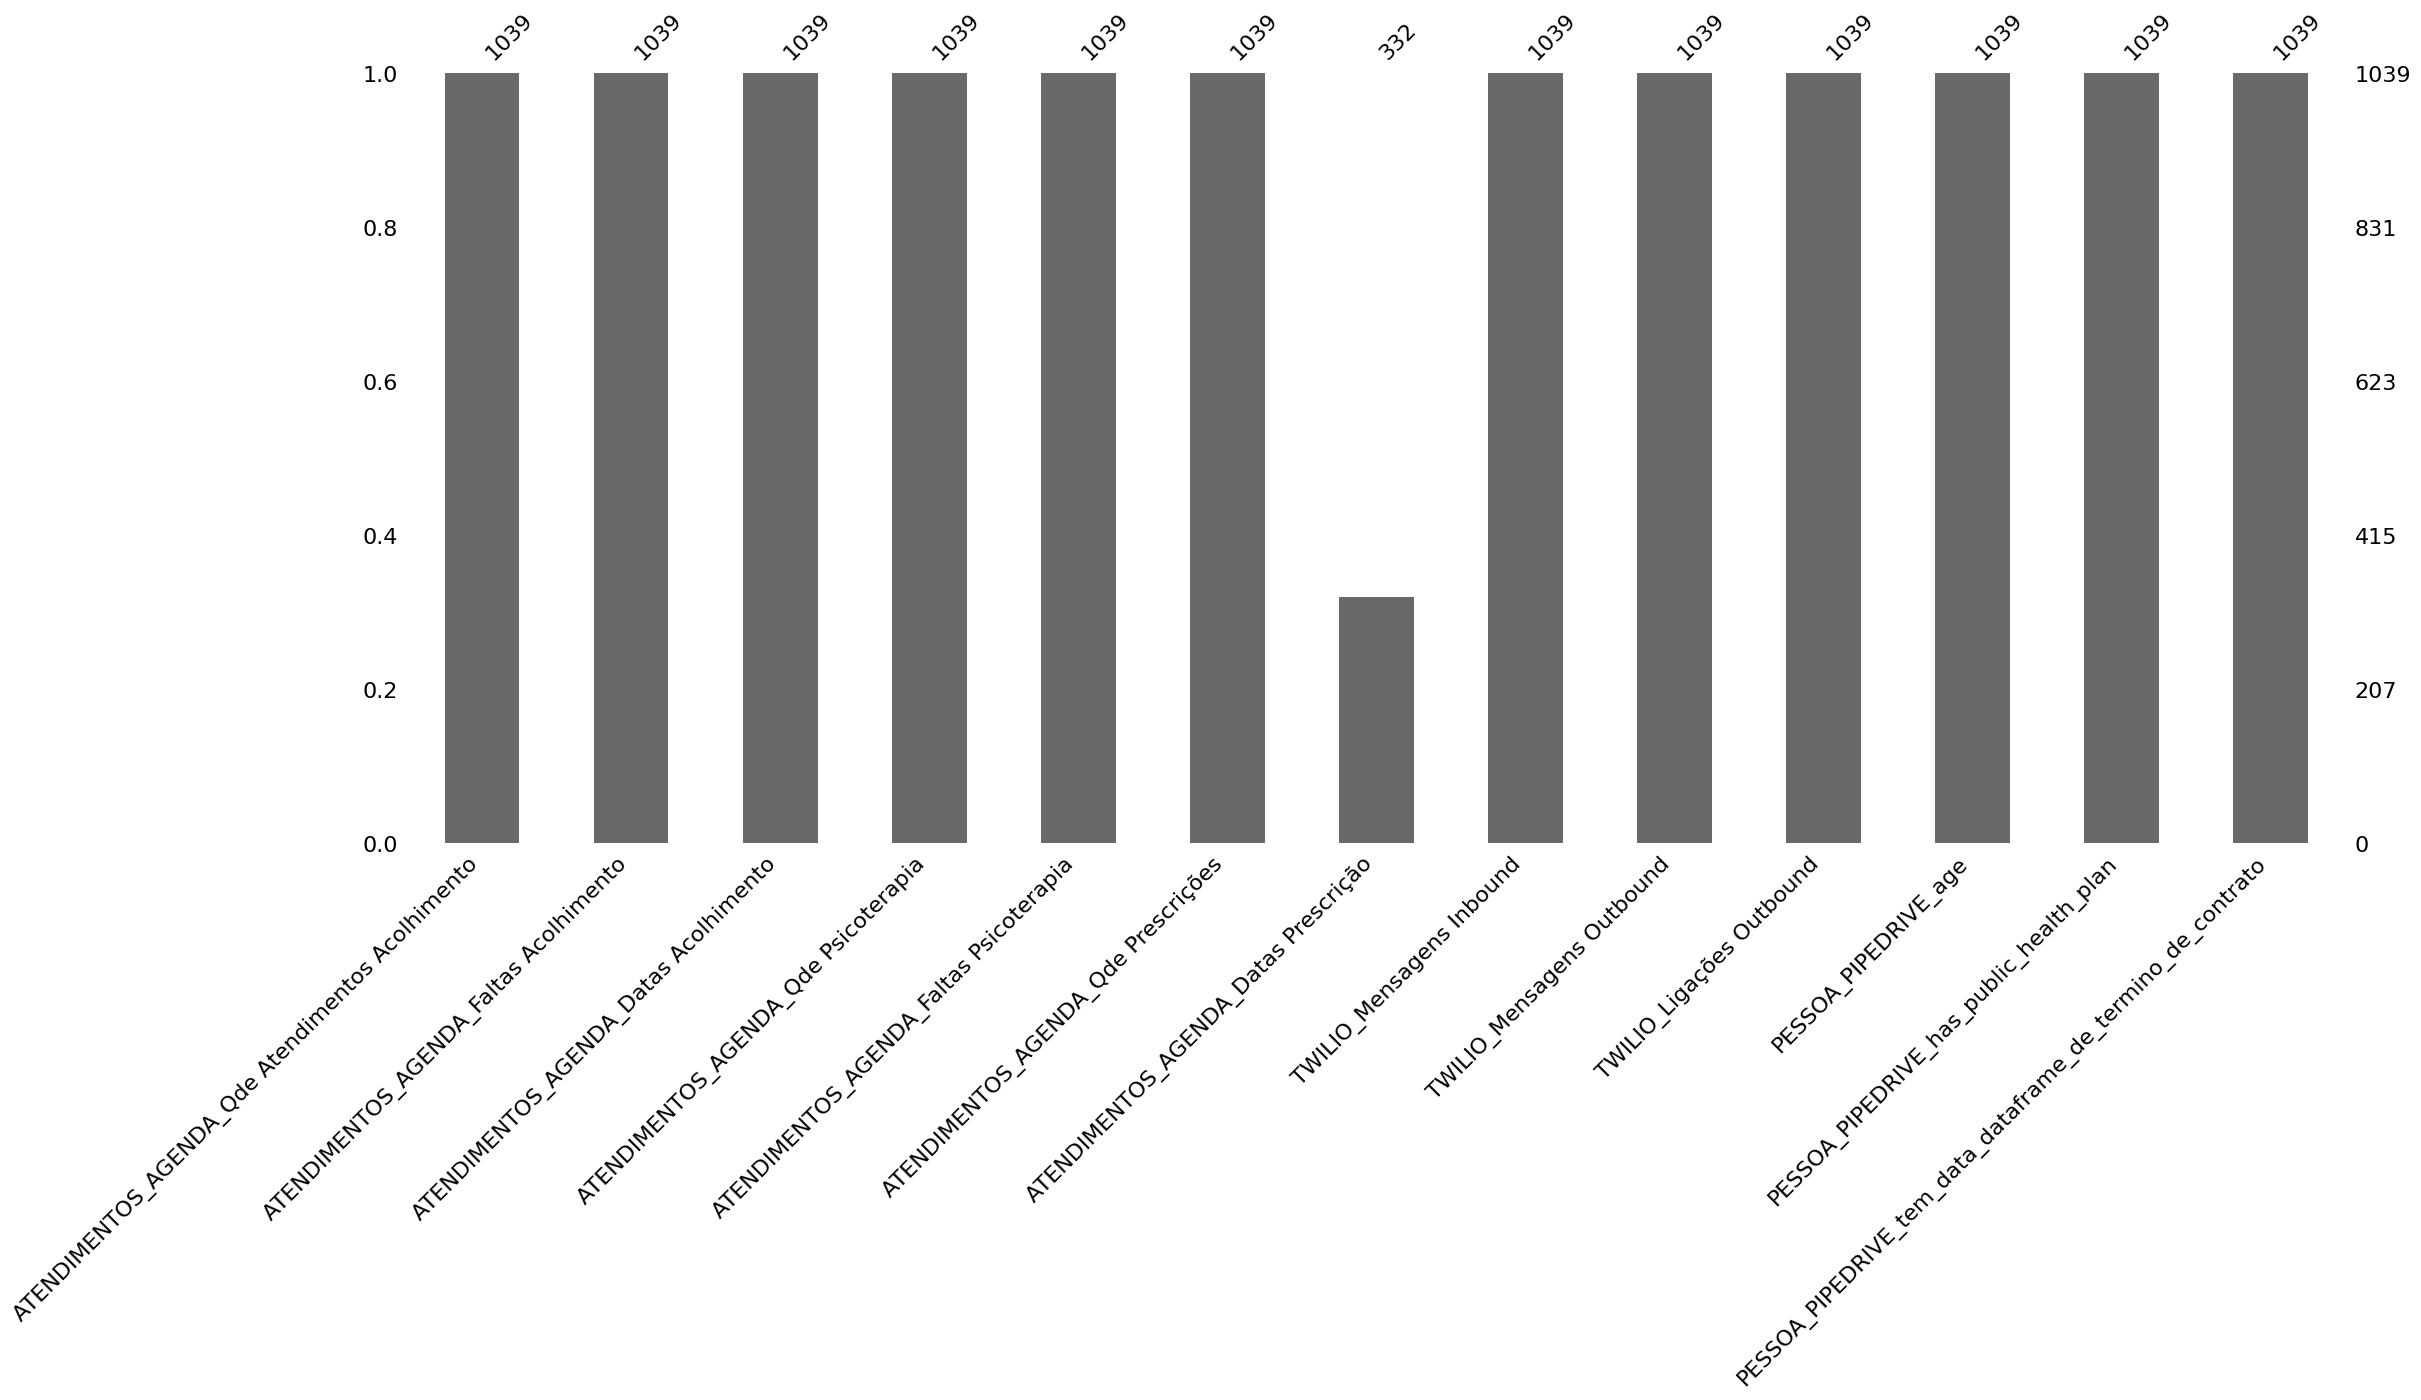

In [6]:
msno.bar(data.iloc[:,26:39])

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# 
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento

Descrição : Contagem dos atendimentos realizados com a equipe de acolhimento da Ana Health

Observação : Junto a coluna "ATENDIMENTOS_AGENDA_Datas Acolhimento", podemos criar uma nova coluna indicando a frequencia de atendimentos por mês de cada cliente


In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"]

0      2
1      0
2      0
3      0
4      0
      ..
967    0
968    1
969    0
970    2
971    0
Name: ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento, Length: 972, dtype: int64

<Axes: >

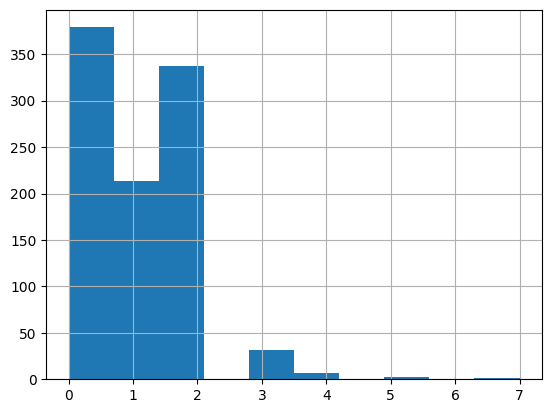

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"].hist()

In [ ]:
data["stay_time"]

0       211 days
1       456 days
2        87 days
3       840 days
4       224 days
         ...    
967    Em aberto
968    Em aberto
969    Em aberto
970    Em aberto
971    Em aberto
Name: stay_time, Length: 972, dtype: object

In [ ]:
data["stay_time"] = data["stay_time"].str.extract('(\d+) days').astype(float)

In [ ]:
data["stay_time"].fillna(0,inplace=True)

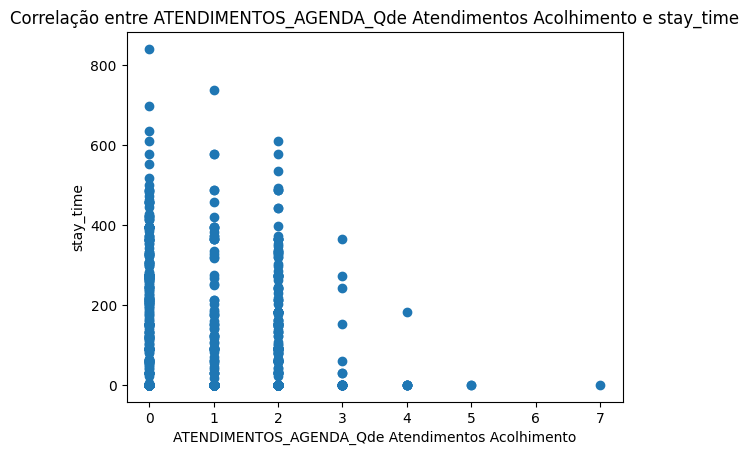

In [ ]:
import matplotlib.pyplot as plt


# Calcular a correlação entre todas as colunas e a coluna alvo
plt.scatter(data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"], data["stay_time"])
plt.title(f'Correlação entre {"ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"} e {"stay_time"}')
plt.xlabel("ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento")
plt.ylabel("stay_time")
plt.show()

In [ ]:
data_corr = data[["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento","stay_time"]]

data_corr.corr()

,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,stay_time
ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,1.000000,-0.219368
stay_time,-0.219368,1.000000


In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"].fillna(0,inplace=True)

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"]

0      2
1      0
2      0
3      0
4      0
      ..
967    0
968    1
969    0
970    2
971    0
Name: ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento, Length: 972, dtype: int64

In [ ]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"].fillna(0,inplace=True)

In [ ]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"]

0      0
1      0
2      0
3      0
4      0
      ..
967    0
968    0
969    0
970    0
971    0
Name: ATENDIMENTOS_AGENDA_Faltas Acolhimento, Length: 972, dtype: int64

In [ ]:
data_corr = data[["ATENDIMENTOS_AGENDA_Faltas Acolhimento","stay_time"]]

data_corr.corr()

,ATENDIMENTOS_AGENDA_Faltas Acolhimento,stay_time
ATENDIMENTOS_AGENDA_Faltas Acolhimento,1.000000,-0.159499
stay_time,-0.159499,1.000000


<Axes: >

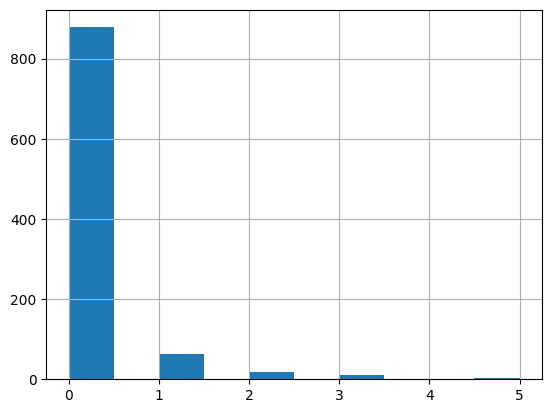

In [ ]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"].hist()

In [ ]:
data["ATENDIMENTOS_AGENDA_Datas Acolhimento"].fillna("Nunca ocorreu",inplace=True)

In [ ]:
data = data[~data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].astype(str).str.contains("Nunca ocorreu")]

In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado 'data' com uma coluna 'ATENDIMENTOS_AGENDA_Datas Acolhimento'
data['ATENDIMENTOS_AGENDA_Datas Acolhimento'] = data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].str.split(';')

# Se você deseja criar uma nova coluna para cada data:
data = data.explode('ATENDIMENTOS_AGENDA_Datas Acolhimento')
data['ATENDIMENTOS_AGENDA_Datas Acolhimento'] = pd.to_datetime(data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].str.strip(), format='%Y-%m-%d %H:%M:%S')




In [ ]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento']

0     2022-04-18 15:00:00
0     2023-06-05 10:00:00
11    2022-04-14 20:00:00
12    2022-04-06 20:00:00
20    2022-03-29 18:00:00
              ...        
965   2023-11-07 09:00:00
965   2023-11-17 09:00:00
968   2023-11-07 12:30:00
970   2023-11-14 18:00:00
970   2023-11-22 18:30:00
Name: ATENDIMENTOS_AGENDA_Datas Acolhimento, Length: 1029, dtype: datetime64[ns]

In [ ]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes'] = data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].dt.month

In [ ]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes']

0       4
0       6
11      4
12      4
20      3
       ..
965    11
965    11
968    11
970    11
970    11
Name: ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes, Length: 1029, dtype: int32

In [ ]:
atendimentos_por_mes = data.groupby(['PESSOA_PIPEDRIVE_id_person', 'ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes']).size().reset_index(name='ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento')


In [ ]:
data = pd.merge(data, atendimentos_por_mes, on=['PESSOA_PIPEDRIVE_id_person', 'ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes'], how='left')

<Axes: >

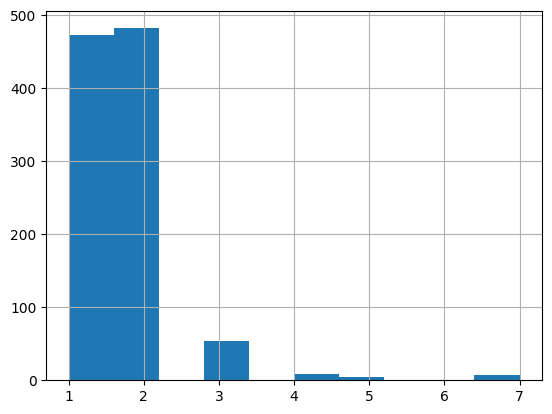

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_y"].hist()

In [ ]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,WHOQOL_Ambiental_New,COMUNICARE_Problemas Abertos Bool,TWILIO_Data Última Mensagens Inbound Recente,stay_time,last_stage_concluded,process_time,TWILIO_Data Última Mensagens Outbound Recente,TWILIO_Data Última Ligações Outbound Recente,ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_y
0,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,4.5,0,False,211.0,Questionário,2022-04-19 15:19:40,True,True,4,1
1,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,4.5,0,False,211.0,Questionário,2022-04-19 15:19:40,True,True,6,1
2,1080,63,80,Pernambuco,Recife,50070-045,2021-07-19,2023-08-18,0,5,...,3.5,1,True,737.0,Questionário,2022-04-18 15:07:13,True,True,4,1
3,1207,64,80,Minas Gerais,Uberlândia,38408-220,2021-08-16,2022-08-16,0,0,...,3.9,0,False,365.0,Questionário,2022-04-07 15:52:55,False,False,4,1
4,1265,63,80,São Paulo,Taboão da Serra,06763-200,2021-08-12,2022-09-11,0,1,...,4.4,0,False,395.0,Questionário,2022-06-03 14:01:23,False,False,3,1


## ATENDIMENTOS_AGENDA_Faltas Acolhimento

Descrição : Contagem das faltas considerando apenas os atendimentos com a equipe de acolhimento


Observação : Junto com a coluna "ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento", podemos criar uma nova coluna indicando a taxa de falta de cada cliente, o que pode ajudar a indicar o nível de comprometimento do cliente com os agendamentos.


In [ ]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"] = data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"] / data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_x"]

In [ ]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"].value_counts()

ATENDIMENTOS_AGENDA_Faltas Taxa
0.000000    914
0.500000     44
1.000000     35
2.000000     11
1.500000     10
0.200000      5
3.000000      4
0.333333      3
2.500000      2
5.000000      1
Name: count, dtype: int64

<Axes: >

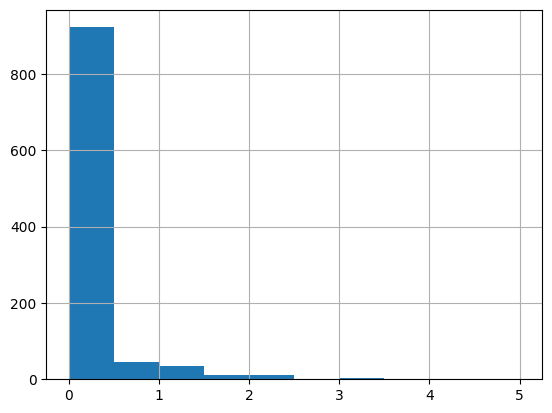

In [ ]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"].hist()

In [ ]:
data["ATENDIMENTOS_AGENDA_Datas Prescrição"]

0                          NaN
1                          NaN
2       10/11/2021; 26/09/2022
3                          NaN
4                          NaN
                 ...          
1024                       NaN
1025                       NaN
1026                       NaN
1027                23/11/2023
1028                23/11/2023
Name: ATENDIMENTOS_AGENDA_Datas Prescrição, Length: 1029, dtype: object

In [ ]:
# data = data.sort_values(["PESSOA_PIPEDRIVE_id_person","ATENDIMENTOS_AGENDA_Datas Prescrição"])

In [ ]:
# data['IntervaloEntrePrescricoes'] = data.groupby('PESSOA_PIPEDRIVE_id_person')['ATENDIMENTOS_AGENDA_Datas Prescrição'].diff()

In [ ]:
# data["IntervaloEntrePrescricoes"].value_counts()

## TWILIO_Mensagens Inbound e TWILIO_Mensagens Outbound

Descrição : Contagem de mensagens enviadas pela pessoa
            e
            Contagem de mensagens enviadas pela equipe de saúde


Observação : Através dessas duas colunas, podemos calcular a razão entre as mensagens recebidas e as mensagens enviadas, conseguindo refletir o engajamento e a participação ativa do cliente na plataforma.


In [ ]:
data["TWILIO_Mensagens Já Enviou"] = data["TWILIO_Mensagens Inbound"] > 0

In [ ]:
data["TWILIO_Mensagens Razão"] = data["TWILIO_Mensagens Outbound"] / data["TWILIO_Mensagens Inbound"].where(data["TWILIO_Mensagens Já Enviou"], 1)

<Axes: >

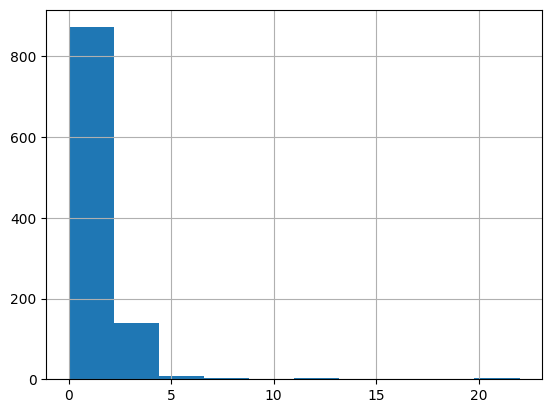

In [ ]:
data["TWILIO_Mensagens Razão"].hist()

In [ ]:
data["TWILIO_Mensagens Razão"].value_counts()

TWILIO_Mensagens Razão
2.000000    25
1.000000    18
3.000000    17
0.000000    16
1.500000    14
            ..
0.930233     1
1.214286     1
2.181818     1
1.163636     1
0.514286     1
Name: count, Length: 455, dtype: int64

## PESSOA_PIPEDRIVE_age

Descrição : Idade da Pessoa


Observação : Iremos dividir essa coluna em Outras, indicando a faixa etária da pessoa, ou seja, se ela pertence a faixa etária criança, jovem, adulto ou idoso

In [ ]:
data["PESSOA_PIPEDRIVE CRIANÇA"] = data["PESSOA_PIPEDRIVE_age"] <= 16

In [ ]:
data["PESSOA_PIPEDRIVE CRIANÇA"].fillna(0)
data["PESSOA_PIPEDRIVE CRIANÇA"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE CRIANÇA"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE CRIANÇA"].value_counts()

PESSOA_PIPEDRIVE CRIANÇA
False    1024
True        5
Name: count, dtype: int64

In [ ]:
data["PESSOA_PIPEDRIVE JOVEM"] = (data["PESSOA_PIPEDRIVE_age"] > 16) & (data["PESSOA_PIPEDRIVE_age"] <= 30)

In [ ]:
data["PESSOA_PIPEDRIVE JOVEM"].fillna(0)
data["PESSOA_PIPEDRIVE JOVEM"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE JOVEM"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE JOVEM"].value_counts()

PESSOA_PIPEDRIVE JOVEM
True     575
False    454
Name: count, dtype: int64

In [ ]:
data["PESSOA_PIPEDRIVE ADULTO"] = (data["PESSOA_PIPEDRIVE_age"] > 30) & (data["PESSOA_PIPEDRIVE_age"] <= 60)

In [ ]:
data["PESSOA_PIPEDRIVE ADULTO"].fillna(0)
data["PESSOA_PIPEDRIVE ADULTO"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE ADULTO"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE ADULTO"].value_counts()

PESSOA_PIPEDRIVE ADULTO
False    599
True     430
Name: count, dtype: int64

In [ ]:
data["PESSOA_PIPEDRIVE IDOSO"] = data["PESSOA_PIPEDRIVE_age"] > 60

In [ ]:
data["PESSOA_PIPEDRIVE IDOSO"].fillna(0)
data["PESSOA_PIPEDRIVE IDOSO"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE IDOSO"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE IDOSO"].value_counts()

PESSOA_PIPEDRIVE IDOSO
False    1010
True       19
Name: count, dtype: int64

In [ ]:
data["PESSOA_PIPEDRIVE_Tem_Canal_de_Preferência"]

0       0
1       0
2       0
3       0
4       0
       ..
1024    0
1025    0
1026    0
1027    1
1028    1
Name: PESSOA_PIPEDRIVE_Tem_Canal_de_Preferência, Length: 1029, dtype: int64

## TWILIO_Ligações Outbound

Descrição : Contagem de ligações feitas pela equipe de saúde

Observação : Iremos criar uma nova coluna indicando se o cliente recebeu uma quantidade significativa de ligações da plataforma, com o intuito de observar que, clientes que não recebem muitas ligações significativas podem ser identificados como potencialmente mais propensos a abandonar a plataforma.

In [ ]:
data["TWILIO_Ligações Outbound Qtd Significativa"] = data["TWILIO_Ligações Outbound"] >= data["TWILIO_Ligações Outbound"].mean()

In [ ]:
data["TWILIO_Ligações Outbound Qtd Significativa"].fillna(0)
data["TWILIO_Ligações Outbound Qtd Significativa"].replace(True, 1, inplace=True)
data["TWILIO_Ligações Outbound Qtd Significativa"].replace(False, 0, inplace=True)

data["TWILIO_Ligações Outbound Qtd Significativa"].value_counts()

TWILIO_Ligações Outbound Qtd Significativa
False    607
True     422
Name: count, dtype: int64

## ATENDIMENTOS_AGENDA_Qde Psicoterapia

Descrição : Contagem de sessões de psicoterapia realizadas com a Ana Health


Observação : Podemos segmentar os clientes com base na quantidade de agendamentos de psicoterapia. Ou seja, criar faixas, como "nenhum agendamento", "poucos agendamentos", "muitos agendamentos", etc. Isso pode ser útil para personalizar a abordagem com diferentes segmentos de clientes.

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia
0     438
1      91
3      61
2      52
5      35
8      34
10     31
6      29
4      27
14     23
11     19
16     19
7      16
19     15
17     14
9      13
13     12
27     11
20     10
18     10
15      9
12      7
25      7
26      6
21      5
28      4
22      4
36      4
42      3
40      3
30      3
48      2
33      2
34      2
23      2
31      2
39      2
24      2
Name: count, dtype: int64

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"] = data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] == 0

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].fillna(0)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].replace(True, 1, inplace=True)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].replace(False, 0, inplace=True)

data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum
False    591
True     438
Name: count, dtype: int64

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"] = (data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] > 0) & (data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] <= data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].mean() )

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].fillna(0)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].replace(True, 1, inplace=True)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].replace(False, 0, inplace=True)

data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco
False    763
True     266
Name: count, dtype: int64

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"] = data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] > data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].mean() 

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].fillna(0)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].replace(True, 1, inplace=True)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].replace(False, 0, inplace=True)

data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito
False    704
True     325
Name: count, dtype: int64

In [ ]:
data["ATENDIMENTOS_AGENDA_Datas Prescrição"]

0                          NaN
1                          NaN
2       10/11/2021; 26/09/2022
3                          NaN
4                          NaN
                 ...          
1024                       NaN
1025                       NaN
1026                       NaN
1027                23/11/2023
1028                23/11/2023
Name: ATENDIMENTOS_AGENDA_Datas Prescrição, Length: 1029, dtype: object

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Prescrições"]

0       NaN
1       NaN
2       2.0
3       NaN
4       NaN
       ... 
1024    NaN
1025    NaN
1026    NaN
1027    1.0
1028    1.0
Name: ATENDIMENTOS_AGENDA_Qde Prescrições, Length: 1029, dtype: float64

## ATENDIMENTOS_AGENDA_Qde Prescrições e ATENDIMENTOS_AGENDA_Datas Prescrição

Descrição : Contagem de prescrições médicas
            e
            Datas dasprescrições médica


Observação : &&&

In [ ]:
data["ATENDIMENTOS_AGENDA_Qde Prescrições"].fillna(0,inplace=True)

In [ ]:
data = data.drop(["ATENDIMENTOS_AGENDA_Datas Prescrição"],axis=1)

## Feature Engineering 2

<Axes: >

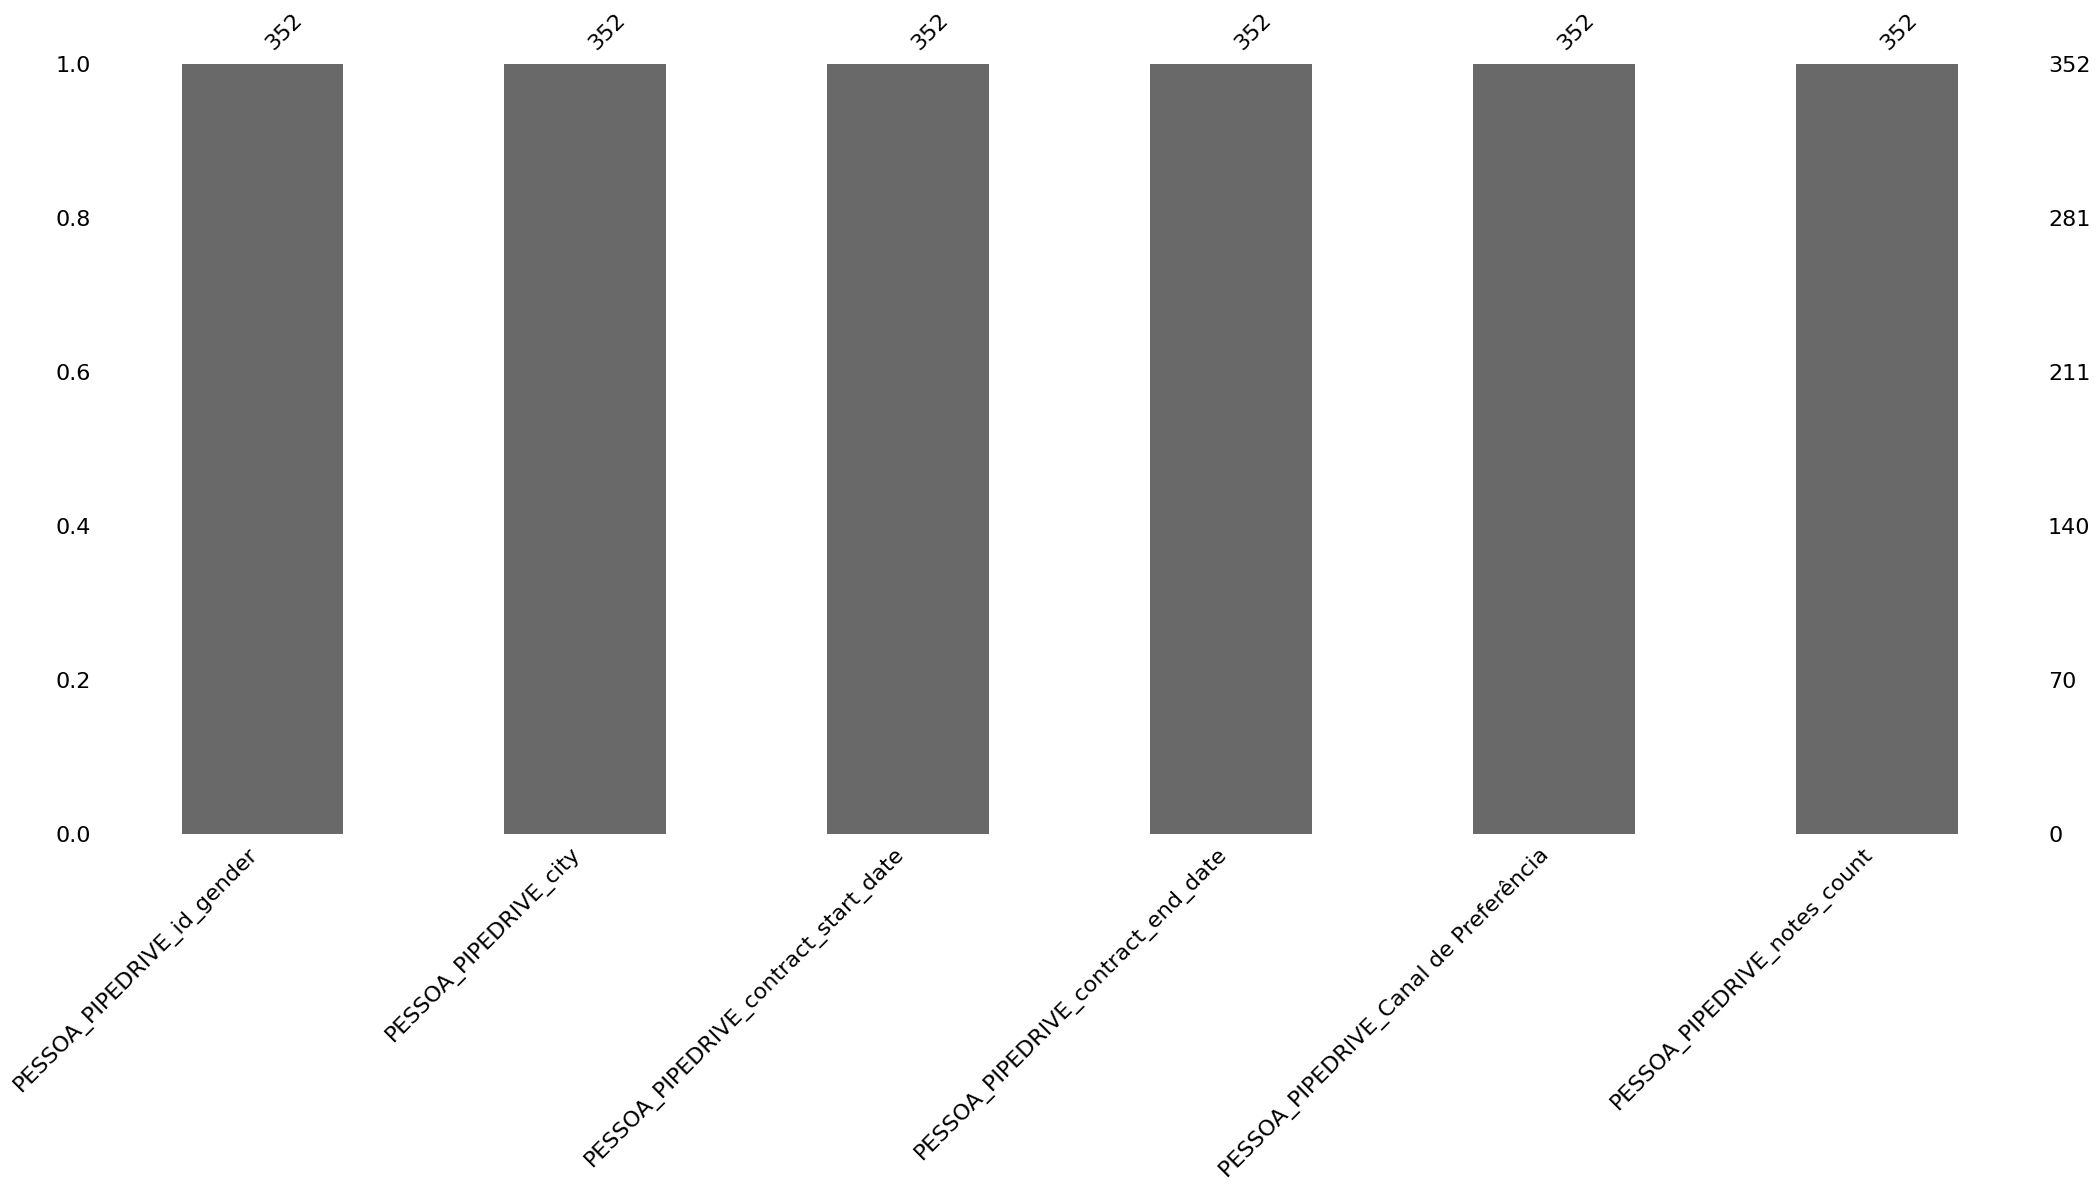

In [ ]:
msno.bar(data.iloc[:,:6])

## PESSOA_PIPEDRIVE_id_person

Descrição : Identificador único da pessoa no Pipedrive. Campo obrigatório, preenchido automaticamente no momento do cadastro.



Observação : excluir posteriormente

In [ ]:
data["PESSOA_PIPEDRIVE_id_person"]

0        483
1        483
2       1080
3       1207
4       1265
        ... 
1024    5939
1025    5939
1026    5948
1027    5954
1028    5954
Name: PESSOA_PIPEDRIVE_id_person, Length: 1029, dtype: int64

## PESSOA_PIPEDRIVE_id_gender

Descrição : Identificador do gênero da pessoa. Campo obrigatório, preenchido automaticamente no momento do cadastro.

Observação : Selecionar somente os gêneros mais significativos (masculino e feminino), e depois criar uma nova coluna Binária representando o genero do cliente, onde 1 representa o gênero Masculino e 0 o feminino.

In [ ]:
data["PESSOA_PIPEDRIVE_id_gender"].value_counts()

PESSOA_PIPEDRIVE_id_gender
64     582
63     437
110      7
117      3
Name: count, dtype: int64

In [ ]:
data = data[data["PESSOA_PIPEDRIVE_id_gender"].isin([64,63])]   

In [ ]:
data["PESSOA_PIPEDRIVE_id_gender"].value_counts()

PESSOA_PIPEDRIVE_id_gender
64    582
63    437
Name: count, dtype: int64

In [ ]:
data

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,TWILIO_Mensagens Já Enviou,TWILIO_Mensagens Razão,PESSOA_PIPEDRIVE CRIANÇA,PESSOA_PIPEDRIVE JOVEM,PESSOA_PIPEDRIVE ADULTO,PESSOA_PIPEDRIVE IDOSO,TWILIO_Ligações Outbound Qtd Significativa,ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum,ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco,ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito
0,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,True,2.125000,False,False,False,True,True,True,False,False
1,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,True,2.125000,False,False,False,True,True,True,False,False
2,1080,63,80,Pernambuco,Recife,50070-045,2021-07-19,2023-08-18,0,5,...,True,0.856546,False,False,True,False,True,False,False,True
3,1207,64,80,Minas Gerais,Uberlândia,38408-220,2021-08-16,2022-08-16,0,0,...,True,1.000000,False,False,True,False,True,True,False,False
4,1265,63,80,São Paulo,Taboão da Serra,06763-200,2021-08-12,2022-09-11,0,1,...,True,2.117647,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,5939,64,83,São Paulo,Ribeirão Preto,14093-010,2023-11-01,NaN,0,0,...,True,2.000000,False,False,True,False,False,False,True,False
1025,5939,64,83,São Paulo,Ribeirão Preto,14093-010,2023-11-01,NaN,0,0,...,True,2.000000,False,False,True,False,False,False,True,False
1026,5948,64,80,Bahia,Salvador,41830-120,2023-11-07,NaN,0,0,...,False,0.000000,False,False,True,False,False,True,False,False
1027,5954,63,82,São Paulo,São Paulo,04513-100,2023-11-07,NaN,239,0,...,False,0.000000,False,False,True,False,False,True,False,False


In [ ]:
data["PESSOA_PIPEDRIVE_id_gender Binário"] = data["PESSOA_PIPEDRIVE_id_gender"].map({64: 0, 63: 1})

In [ ]:
data["PESSOA_PIPEDRIVE_id_gender Binário"]

0       0
1       0
2       1
3       0
4       1
       ..
1024    0
1025    0
1026    0
1027    1
1028    1
Name: PESSOA_PIPEDRIVE_id_gender Binário, Length: 1019, dtype: int64

## PESSOA_PIPEDRIVE_id_marrital_status

Descrição : Identificador do estado civil da pessoa. Campo obrigatório, preenchido automaticamente no momento do cadastro.


Observação : Realizamos one-hot encoding

In [ ]:
data["PESSOA_PIPEDRIVE_id_marrital_status"]

0       80
1       80
2       80
3       80
4       80
        ..
1024    83
1025    83
1026    80
1027    82
1028    82
Name: PESSOA_PIPEDRIVE_id_marrital_status, Length: 1019, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['PESSOA_PIPEDRIVE_id_marrital_status'], prefix='Status')

In [ ]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,PESSOA_PIPEDRIVE_done_activities_count,...,PESSOA_PIPEDRIVE IDOSO,TWILIO_Ligações Outbound Qtd Significativa,ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum,ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco,ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito,PESSOA_PIPEDRIVE_id_gender Binário,Status_80,Status_81,Status_82,Status_83
0,483,64,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,...,True,True,True,False,False,0,True,False,False,False
1,483,64,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,...,True,True,True,False,False,0,True,False,False,False
2,1080,63,Pernambuco,Recife,50070-045,2021-07-19,2023-08-18,0,5,50,...,False,True,False,False,True,1,True,False,False,False
3,1207,64,Minas Gerais,Uberlândia,38408-220,2021-08-16,2022-08-16,0,0,9,...,False,True,True,False,False,0,True,False,False,False
4,1265,63,São Paulo,Taboão da Serra,06763-200,2021-08-12,2022-09-11,0,1,14,...,False,False,True,False,False,1,True,False,False,False


## PESSOA_PIPEDRIVE_state

Descrição : Estado onde a pessoa reside. Campo obrigatório, preenchido automaticamente no momento do cadastro.


Observação : Realizamos one-hot encoding

In [ ]:
data["PESSOA_PIPEDRIVE_state"].value_counts()

PESSOA_PIPEDRIVE_state
São Paulo              431
Amazonas               187
Santa Catarina         114
Rio de Janeiro          59
Minas Gerais            52
Paraná                  43
Bahia                   39
Pernambuco              18
Ceará                   12
State of Amazonas       12
Rio Grande do Sul       12
Espírito Santo           6
Distrito Federal         6
Paraíba                  6
Alagoas                  4
Mato Grosso do Sul       4
Pará                     4
Rio Grande do Norte      4
Sergipe                  3
Piauí                    2
Maranhão                 1
Name: count, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['PESSOA_PIPEDRIVE_state'], prefix='Estado')

In [ ]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,PESSOA_PIPEDRIVE_done_activities_count,FUNIL_ASSINATURA_PIPEDRIVE_id_stage,...,Estado_Pará,Estado_Pernambuco,Estado_Piauí,Estado_Rio Grande do Norte,Estado_Rio Grande do Sul,Estado_Rio de Janeiro,Estado_Santa Catarina,Estado_Sergipe,Estado_State of Amazonas,Estado_São Paulo
0,483,64,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,64,...,False,False,False,False,False,False,False,False,False,False
1,483,64,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,64,...,False,False,False,False,False,False,False,False,False,False
2,1080,63,Recife,50070-045,2021-07-19,2023-08-18,0,5,50,64,...,False,True,False,False,False,False,False,False,False,False
3,1207,64,Uberlândia,38408-220,2021-08-16,2022-08-16,0,0,9,65,...,False,False,False,False,False,False,False,False,False,False
4,1265,63,Taboão da Serra,06763-200,2021-08-12,2022-09-11,0,1,14,65,...,False,False,False,False,False,False,False,False,False,True


## PESSOA_PIPEDRIVE_city

Descrição : Cidade onde a pessoa reside. Campo obrigatório, preenchido automaticamente no momento do cadastro.

Observação : Realizamos uma codificação de frequência na coluna.

In [ ]:
data["PESSOA_PIPEDRIVE_city"].value_counts()

PESSOA_PIPEDRIVE_city
São Paulo         173
Novo Airão        120
Manaus             79
São Carlos         54
Rio de Janeiro     49
                 ... 
Taubaté             1
Viamão              1
Ituverava           1
Votorantim          1
Petrópolis          1
Name: count, Length: 114, dtype: int64

In [ ]:
from category_encoders import CountEncoder

# Suponha que você tenha um DataFrame chamado 'dados' com uma coluna 'Cidade'
ce = CountEncoder()
data['PESSOA_PIPEDRIVE_city Codificada'] = ce.fit_transform(data['PESSOA_PIPEDRIVE_city'])

In [ ]:
data["PESSOA_PIPEDRIVE_city Codificada"].value_counts()

PESSOA_PIPEDRIVE_city Codificada
173    173
120    120
2       84
79      79
32      64
54      54
49      49
4       44
41      41
3       36
6       36
30      30
28      28
27      27
5       25
23      23
19      19
1       18
8       16
13      13
12      12
11      11
10      10
7        7
Name: count, dtype: int64

In [ ]:
data = data.drop(columns=["PESSOA_PIPEDRIVE_city"])

In [ ]:
data["PESSOA_PIPEDRIVE_postal_code"]

0       36021-600
1       36021-600
2       50070-045
3       38408-220
4       06763-200
          ...    
1024    14093-010
1025    14093-010
1026    41830-120
1027    04513-100
1028    04513-100
Name: PESSOA_PIPEDRIVE_postal_code, Length: 1019, dtype: object

In [ ]:
data = data.drop(columns=["PESSOA_PIPEDRIVE_postal_code","PESSOA_PIPEDRIVE_id_person"])

In [ ]:
data["PESSOA_PIPEDRIVE_contract_start_date"] = pd.to_datetime(data["PESSOA_PIPEDRIVE_contract_start_date"], format='%Y-%m-%d')

In [ ]:
data["PESSOA_PIPEDRIVE_contract_end_date"]

0       2023-08-26
1       2023-08-26
2       2023-08-18
3       2022-08-16
4       2022-09-11
           ...    
1024           NaN
1025           NaN
1026           NaN
1027           NaN
1028           NaN
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 1019, dtype: object

In [ ]:
data = data[data["PESSOA_PIPEDRIVE_contract_end_date"].notna()]

In [ ]:
data["PESSOA_PIPEDRIVE_contract_end_date"] = pd.to_datetime(data["PESSOA_PIPEDRIVE_contract_end_date"], format='%Y-%m-%d')

ValueError: time data "8" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
data["PESSOA_PIPEDRIVE_contract_end_date"] = data["PESSOA_PIPEDRIVE_contract_end_date"].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
data["PESSOA_PIPEDRIVE_contract_end_date"]

0       8.0
1       8.0
2       8.0
3       8.0
4       9.0
       ... 
921    10.0
922    10.0
929     9.0
945    11.0
946    11.0
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 352, dtype: float64

In [ ]:
data["PESSOA_PIPEDRIVE_contract_end_date"] = data["PESSOA_PIPEDRIVE_contract_end_date"].astype(int)

In [ ]:
data["PESSOA_PIPEDRIVE_contract_start_date"] = data["PESSOA_PIPEDRIVE_contract_start_date"].dt.month

In [ ]:
data["PESSOA_PIPEDRIVE_contract_end_date"]

0       8
1       8
2       8
3       8
4       9
       ..
921    10
922    10
929     9
945    11
946    11
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 352, dtype: int64

In [ ]:
data["Saiu próximo mês"] = (data["PESSOA_PIPEDRIVE_contract_start_date"]) == (data["PESSOA_PIPEDRIVE_contract_end_date"] + 1)

In [ ]:
data["Saiu próximo mês"].value_counts()

Saiu próximo mês
False    337
True      15
Name: count, dtype: int64

## Separa dados em treino e teste

In [ ]:
X = data.drop(columns=["Saiu próximo mês"])

Y = data["Saiu próximo mês"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Exiba as formas dos conjuntos de treino e teste
print("Forma dos dados de treino:", X_train.shape)
print("Forma dos dados de teste:", X_test.shape)
print("Forma da variável alvo de treino:", Y_train.shape)
print("Forma da variável alvo de teste:", Y_test.shape)

Forma dos dados de treino: (281, 86)
Forma dos dados de teste: (71, 86)
Forma da variável alvo de treino: (281,)
Forma da variável alvo de teste: (71,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo = LinearRegression()
modelo.fit(X_train, Y_test)

# Avaliação no conjunto de treino
y_treino_predito = modelo.predict(X_train)
mse_treino = mean_squared_error(Y_train, y_treino_predito)
r2_treino = r2_score(Y_train, y_treino_predito)

print(f'Desempenho no treino - MSE: {mse_treino}, R2: {r2_treino}')

# Avaliação no conjunto de teste
y_teste_predito = modelo.predict(X_test)
mse_teste = mean_squared_error(Y_test, y_teste_predito)
r2_teste = r2_score(Y_test, y_teste_predito)

print(f'Desempenho no teste - MSE: {mse_teste}, R2: {r2_teste}')

ValueError: could not convert string to float: 'São Paulo'